In [1]:
import sys
sys.path.append('../../')
from src.util.config import Config

**Setting**
create specific Bertrand Pricing setting

In [3]:
# parameter demand (default: 1, 1)
slope = 1
intercept = 1

# parameter mechanism
bidder = ['1']*2
o_space = {'1': [0.0, slope/intercept]}
a_space = {'1': [0.0, slope/intercept]}

param_prior = {
    'distribution': 'uniform',
    }


param_util = {
    'tie_breaking': 'random',
    'demand': 'linear', 
    'slope': slope, 
    'intercept': intercept,
}
                                                                  
# parameter approximation game
n = 64
m = 64

config = Config()
config.create_config_game("bertrand_pricing", bidder, o_space, a_space, param_prior, param_util, n, m)
game = config.create_game()
if not game.mechanism.own_gradient:
    game.get_utility()

own gradient


**Learner**
Specify Learning Algorithm

In [9]:
# parameter learner
max_iter = int(2e3)
tol = 1e-4
stop_criterion = 'util_loss'
param_learner = {
    "mirror_map": "euclidean",
    "steprule_bool": True,
    "eta": 1,
    "beta": 0.5,
}

config.create_config_learner("soma", max_iter, tol, stop_criterion, param_learner)
learner = config.create_learner()

Run Learning Algorithm

In [10]:
#create and initialize strategies
strategies = config.create_strategies(game, "random")

# run learn algorithm
learner.run(game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=True)

100%|████████████████████| 2.00k/2.00k [00:00<00:00, 2.50kit/s]

No convergence with stopping criterion
Current value of (util_loss): 0.00028
Best value of (util_loss)   : 0.00028)


Visualization of the learning process and the final result - analytical BNE according to Lofaro (2002) / Ferreira & Ferreira (2010)

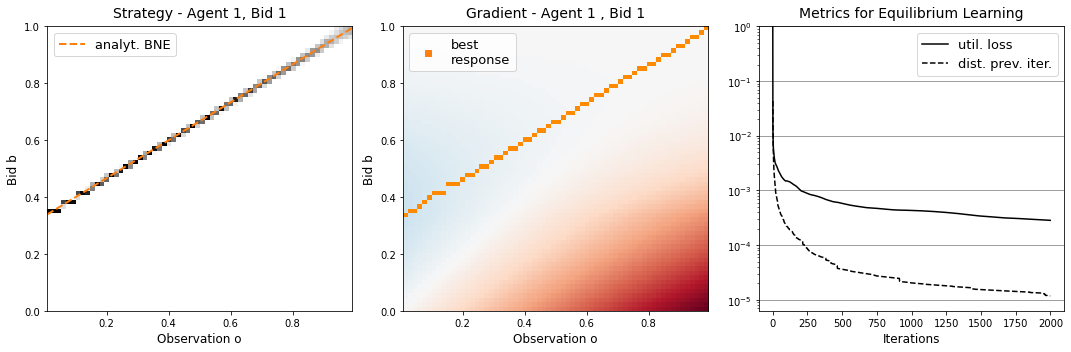

In [11]:
strategies['1'].plot(grad=True, metrics=True, beta=lambda x: (slope / (intercept * (1 + len(bidder))) + (len(bidder) / (1 + len(bidder))) * x))